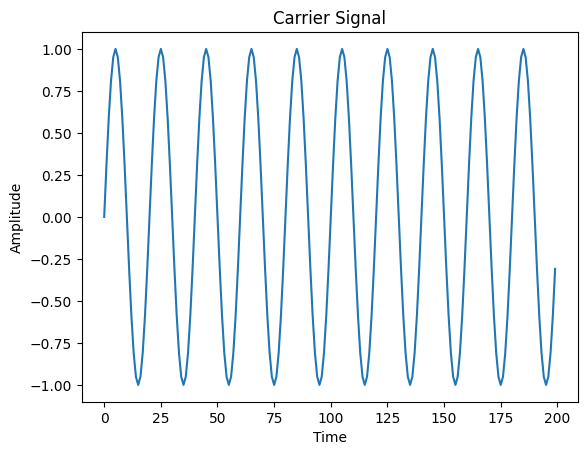

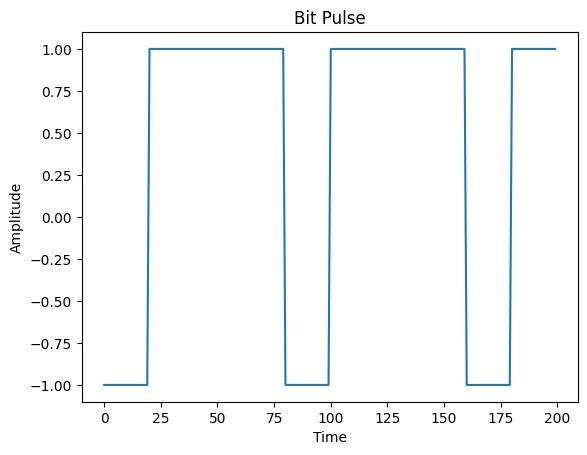

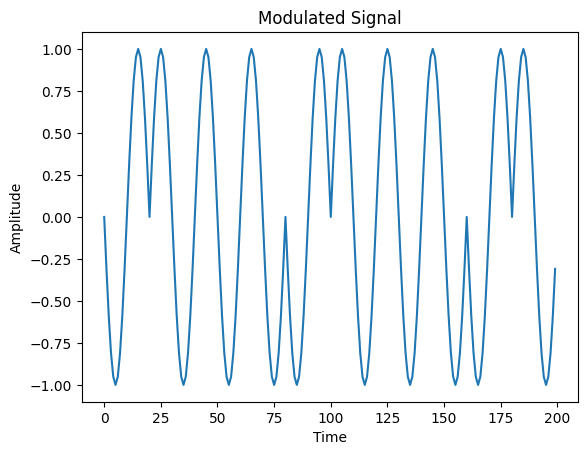

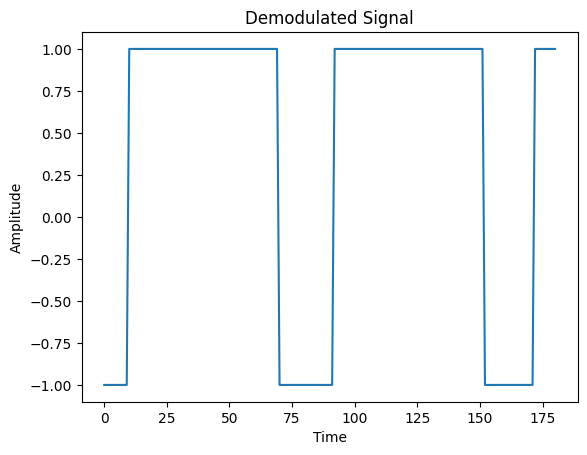

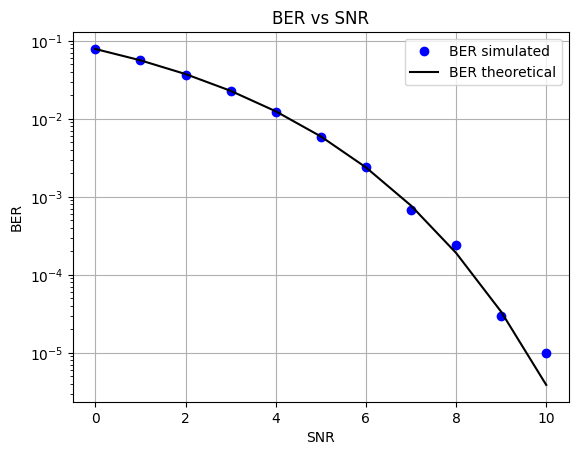

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import random

def generate_carrier_signal(freq, amp, num_samples, sampling_freq):
    t = np.arange(num_samples) / sampling_freq
    carrier_signal = amp * np.sin(2 * np.pi * freq * t)
    return carrier_signal

def generate_bit_pulse(num_bits, num_samples):
    pulse_width = num_samples // (num_bits)
    bit_pulse = np.ones(num_samples)
    for i in range(num_bits):
        start_index = i * 4 * pulse_width
        bit_pulse[start_index:start_index + pulse_width] = -1
    return bit_pulse

def generate_modulated_signal(carrier_signal, bit_pulse):
    return carrier_signal * bit_pulse

def bpsk_demodulation(modulated_signal, carrier_signal, sampling_freq, num_bits):
    multiplied_signal = modulated_signal * carrier_signal
    
    bit_period = sampling_freq // freq
    integrated_signal = np.convolve(multiplied_signal, np.ones(bit_period), mode='valid')
    
    threshold = 0
    demodulated_signal = np.where(integrated_signal > threshold, 1, -1)
    
    return demodulated_signal

num_bits = 10
freq = 50
amp = 1
sampling_freq = 1000
num_samples = num_bits * sampling_freq // freq

carrier_signal = generate_carrier_signal(freq, amp, num_samples, sampling_freq)

bit_pulse = generate_bit_pulse(num_bits, num_samples)

modulated_signal = generate_modulated_signal(carrier_signal, bit_pulse)

demodulated_signal = bpsk_demodulation(modulated_signal, carrier_signal, sampling_freq, num_bits)

plt.plot(np.arange(num_samples), carrier_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Carrier Signal')
plt.show()

plt.plot(np.arange(num_samples), bit_pulse)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Bit Pulse')
plt.show()

plt.plot(np.arange(num_samples), modulated_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Modulated Signal')
plt.show()

plt.plot(np.arange(len(demodulated_signal)), demodulated_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Demodulated Signal')
plt.show()

snr_range = np.arange(0,11)
Nsym = 10 ** 5
BER_sim = np.zeros(len(snr_range))
sym = [random.choice([1,0]) for i in range(Nsym)]
NRZop = [1 if sym[i] == 1 else -1 for i in range(Nsym)]
NRZ = np.array(NRZop)
for i, snr in enumerate(snr_range):
    gamma = 10 ** (snr / 10)
    P = sum(abs(NRZ) ** 2) / len(NRZ)
    N0 = P / gamma
    n = np.sqrt(N0 / 2) * np.random.standard_normal(NRZ.shape)
    r = NRZ + n
    symDetect = np.zeros(len(r))
    for j in range(len(r)):
        if r[j] > 0:
            symDetect[j] = 1
        else:
            symDetect[j] = 0
    BER_sim[i] = np.sum(symDetect != sym) / Nsym

BER_theo = 0.5 * erfc( np.sqrt(10 ** (snr_range / 10)))

plt.plot(snr_range, BER_sim, 'bo', label = 'BER simulated')
plt.plot(snr_range, BER_theo, 'k', label = 'BER theoretical')
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.ylabel('BER')
plt.xlabel('SNR')
plt.title('BER vs SNR')
plt.grid(True)
plt.show()
